Epoch 1/50
20/20 [==============================] - 1s 15ms/step - loss: 0.7139 - accuracy: 0.5078 - val_loss: 0.7045 - val_accuracy: 0.4688
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.5047 - val_loss: 0.7031 - val_accuracy: 0.4500
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5125 - val_loss: 0.7042 - val_accuracy: 0.4812
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5297 - val_loss: 0.7051 - val_accuracy: 0.4875
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.5109 - val_loss: 0.7054 - val_accuracy: 0.4625
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5281 - val_loss: 0.7032 - val_accuracy: 0.4812
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5516 - val_loss: 0.7016 - val_accuracy: 0.4875
Epoch 8/50
20/20 [=

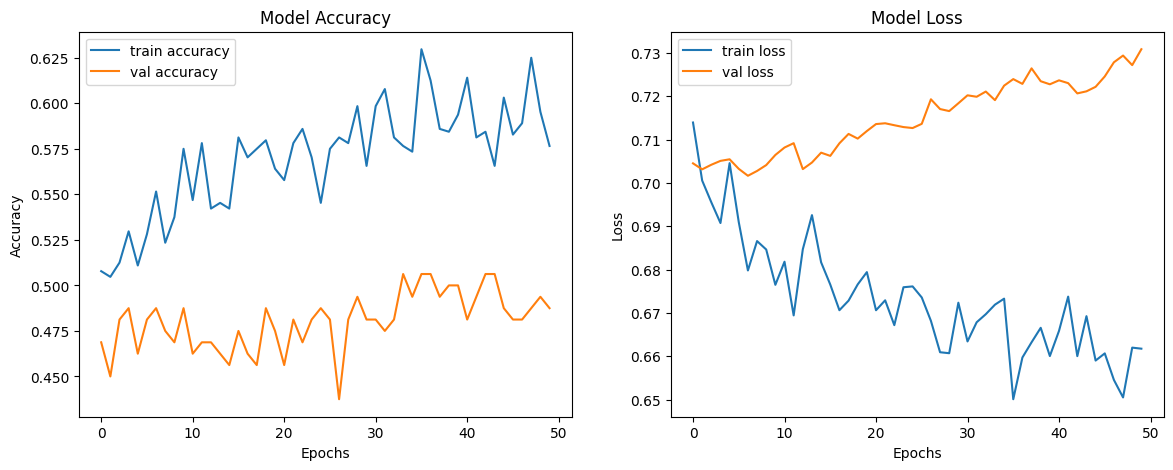

In [3]:
!pip install pandas scikit-learn tensorflow matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# Create a fictional dataset
np.random.seed(42)
n_samples = 1000
data = pd.DataFrame({
    'sensor1': np.random.normal(size=n_samples),
    'sensor2': np.random.normal(size=n_samples),
    'sensor3': np.random.normal(size=n_samples),
    'sensor4': np.random.normal(size=n_samples),
    'sensor5': np.random.normal(size=n_samples),
    'maintenance_needed': np.random.choice([0, 1], size=n_samples)
})

# Displaying the first few rows of the dataset
data.head()
# Creating a fictional dataset
np.random.seed(42)
n_samples = 1000
data = pd.DataFrame({
    'sensor1': np.random.normal(size=n_samples),
    'sensor2': np.random.normal(size=n_samples),
    'sensor3': np.random.normal(size=n_samples),
    'sensor4': np.random.normal(size=n_samples),
    'sensor5': np.random.normal(size=n_samples),
    'maintenance_needed': np.random.choice([0, 1], size=n_samples)
})

# Displaying the first few rows of the dataset
data.head()
# Splitting the data into features and target variable
X = data.drop('maintenance_needed', axis=1)
y = data['maintenance_needed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Building the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32)
# Evaluating the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Printing the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plotting training & validation accuracy and loss
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axs[0].plot(history.history['accuracy'], label='train accuracy')
axs[0].plot(history.history['val_accuracy'], label='val accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Loss
axs[1].plot(history.history['loss'], label='train loss')
axs[1].plot(history.history['val_loss'], label='val loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()
